<a href="https://colab.research.google.com/github/Harisiva2002/python/blob/main/Crop_Prediction_Updated_v_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
crop = pd.read_csv("/content/Pre_Processed_PRED.csv")

In [3]:
crops=['Arhar','Bajra','Barley','Copra','Gram','Groundnut','Jowar','Jute','Maize','Masoor','Moong','Niger','Paddy','Ragi','Rape','Salflower','Semamum','Soyabean','Sugarcane','Sunflower','Urad']

In [4]:
crop.head()

,Name,Month,Year,Rainfall,WPI
0,1,1,2018,19.2,114.9
1,1,2,2018,20.1,116.5
2,1,3,2018,27.1,116.6
3,1,4,2018,40.2,115.3
4,1,5,2018,62.7,115.9


In [5]:
crop.tail()

,Name,Month,Year,Rainfall,WPI
259,21,8,2018,254.3,148.6
260,21,9,2018,171.9,149.8
261,21,10,2018,77.2,151.1
262,21,11,2018,28.1,152.2
263,21,12,2018,14.1,152.8


In [6]:
crop.columns

Index(['Name', 'Month', 'Year', 'Rainfall', 'WPI'], dtype='object')

**Total No of rows and columns**

In [7]:
crop.shape

(264, 5)

In [8]:
crop.isnull().sum()

Name        0
Month       0
Year        0
Rainfall    0
WPI         0
dtype: int64

In [9]:
crop.describe()

,Name,Month,Year,Rainfall,WPI
count,264.000000,264.000000,264.0,264.000000,264.000000
mean,10.681818,6.500000,2018.0,97.183333,139.336742
std,6.104686,3.458609,0.0,93.306829,25.113823
min,1.000000,1.000000,2018.0,14.100000,98.900000
25%,5.000000,3.750000,2018.0,25.350000,119.750000
50%,10.500000,6.500000,2018.0,51.450000,137.650000
75%,16.000000,9.250000,2018.0,166.725000,151.175000
max,21.000000,12.000000,2018.0,286.300000,220.800000


In [10]:
crop['Name'].value_counts()

4     24
1     12
12    12
20    12
19    12
18    12
17    12
16    12
15    12
14    12
13    12
11    12
2     12
10    12
9     12
8     12
7     12
6     12
5     12
3     12
21    12
Name: Name, dtype: int64

**Taking the Target variable**

In [11]:
y=crop['Name']
y.shape   # target variable 

(264,)

**Taking the factors**

In [12]:
x=crop.loc[:, ['Month', 'Year','Rainfall','WPI']]
x.shape  # features

(264, 4)

**Normalization**

In [13]:
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

**Splittig in to train test data**

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)


In [15]:
x_train.shape

(237, 4)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

**Logistic Regression**

In [17]:
logis = LogisticRegression(random_state=42, multi_class='ovr')

In [18]:
model = logis.fit(x_train,y_train)

In [19]:
scores=logis.score(x_test,y_test) #Y_test is the actual output and predictions is the predicted output of x_test 

In [20]:
print('Accuracy of the model is{}'.format(round(scores,2)))

Accuracy of the model is0.15


In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logis, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Accuracy Scores [0.20833333 0.125      0.125      0.20833333 0.16666667 0.20833333
 0.16666667 0.13043478 0.13043478 0.2173913 ]


In [22]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.125, 0.1686594202898551, 0.21739130434782608)

**Testing What crop to be planted**

In [23]:


month=int(input('Enter the Month'))
year=int(input('Enter Year'))
rainfall=float(input('Enter Rainfall Amount'))
wpi=float(input('Enter the wpi value'))


Enter the Month6
Enter Year2023
Enter Rainfall Amount20.1
Enter the wpi value115


In [24]:
import numpy as np
prediction = [[month,year,rainfall,wpi]]
output=model.predict(prediction)
for i in output:
  output=i-1

print('The Crop to be planted is    {}'.format(crops[output]))

The Crop to be planted is    Arhar


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
model.predict(prediction)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

**Decision Tree**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [27]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=5,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [28]:
y_predict=clf_entropy.predict(x_test)

In [29]:
acc=accuracy_score(y_predict,y_test)

In [30]:
print('Test Accuracy Score',round(acc,2))

Test Accuracy Score 0.15


In [31]:

from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          18       0.33      1.00      0.50         1
          19       0.00      0.00      0.00         2
          20       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

**Testing**

In [33]:

month=int(input('Enter the Month'))
year=int(input('Enter Year'))
rainfall=float(input('Enter Rainfall Amount'))
wpi=float(input('Enter the wpi value'))

import numpy as np
prediction = [[month,year,rainfall,wpi]]
out=clf_entropy.predict(prediction)
for i in out:
  out=i-1

print('The Crop to be planted is    {}'.format(crops[out]))

Enter the Month5
Enter Year2018
Enter Rainfall Amount14
Enter the wpi value115
The Crop to be planted is    Gram


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Support Vector Machine

In [34]:
from sklearn.svm import SVC
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

# train the model
svm_clf.fit(x_train,y_train)
svm_clf.best_params_ 


# predictions
svm_predict = svm_clf.predict(x_test)


#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Using SVM we get an accuracy of 14.81%


In [35]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.20      1.00      0.33         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [36]:

month=int(input('Enter the Month'))
year=int(input('Enter Year'))
rainfall=float(input('Enter Rainfall Amount'))
wpi=float(input('Enter the wpi value'))

import numpy as np
prediction = [[month,year,rainfall,wpi]]
out=svm_clf.predict(prediction)
for i in out:
  out=i-1

print('The Crop to be planted is    {}'.format(crops[out]))

Enter the Month5
Enter Year2082
Enter Rainfall Amount11
Enter the wpi value203
The Crop to be planted is    Copra


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)
 
# performing predictions on the test dataset
random_y_pred = clf.predict(x_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, random_y_pred))




ACCURACY OF THE MODEL:  0.07407407407407407


In [38]:

# using the feature importance variable
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,['Month', 'Year','Rainfall','WPI']).sort_values(ascending = False)
feature_imp

WPI         0.836518
Month       0.086163
Rainfall    0.077320
Year        0.000000
dtype: float64

In [39]:
print(classification_report(y_test,random_y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          18       0.25    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [40]:

month=int(input('Enter the Month'))
year=int(input('Enter Year'))
rainfall=float(input('Enter Rainfall Amount'))
wpi=float(input('Enter the wpi value'))

import numpy as np
prediction = [[month,year,rainfall,wpi]]
out=clf.predict(prediction)
for i in out:
  out=i-1

print('The Crop to be planted is    {}'.format(crops[out]))

Enter the Month9
Enter Year2023
Enter Rainfall Amount19
Enter the wpi value200
The Crop to be planted is    Paddy


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
crop.Rainfall.median()

51.45

In [42]:
crop.Rainfall.sum()

25656.4

In [43]:
crop.Rainfall.max()

286.3

In [44]:
crop.Rainfall.min()

14.1

In [45]:
crop.groupby('Rainfall').Rainfall.agg(['count','min','max','mean'])

,count,min,max,mean
Rainfall,,,,
14.1,22,14.1,14.1,14.1
19.2,22,19.2,19.2,19.2
20.1,22,20.1,20.1,20.1
27.1,22,27.1,27.1,27.1
28.1,22,28.1,28.1,28.1
40.2,22,40.2,40.2,40.2
62.7,22,62.7,62.7,62.7
77.2,22,77.2,77.2,77.2
165.0,22,165.0,165.0,165.0


In [46]:
crop.iloc[1:100]

,Name,Month,Year,Rainfall,WPI
1,1,2,2018,20.1,116.5
2,1,3,2018,27.1,116.6
3,1,4,2018,40.2,115.3
4,1,5,2018,62.7,115.9
5,1,6,2018,165.0,113.2
...,...,...,...,...,...
95,7,12,2018,14.1,189.3
96,8,1,2018,19.2,116.4
97,8,2,2018,20.1,117.3
98,8,3,2018,27.1,117.3


In [47]:
crop.iloc[ 1:28 , [1,3,4] ]

,Month,Rainfall,WPI
1,2,20.1,116.5
2,3,27.1,116.6
3,4,40.2,115.3
4,5,62.7,115.9
5,6,165.0,113.2
6,7,286.3,111.2
7,8,254.3,110.8
8,9,171.9,110.8
9,10,77.2,109.4
10,11,28.1,114.0


In [48]:
crop.isnull().sum() 

Name        0
Month       0
Year        0
Rainfall    0
WPI         0
dtype: int64

In [49]:
dir = crop['Name'].unique().tolist()
len(dir)

21

In [50]:
dir = crop['Month'].unique().tolist()
len(dir)

12

In [51]:
predict=crop['Month']

In [52]:
predict.head(12)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: Month, dtype: int64

In [53]:
predict=crop['Name']

In [54]:
predict.head()

0    1
1    1
2    1
3    1
4    1
Name: Name, dtype: int64

<Axes: >

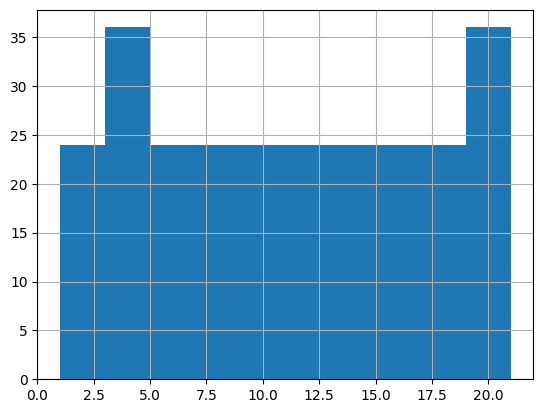

In [55]:
predict.hist()

In [56]:
crop['Rainfall'].diff()

0       NaN
1       0.9
2       7.0
3      13.1
4      22.5
       ... 
259   -32.0
260   -82.4
261   -94.7
262   -49.1
263   -14.0
Name: Rainfall, Length: 264, dtype: float64

<Axes: >

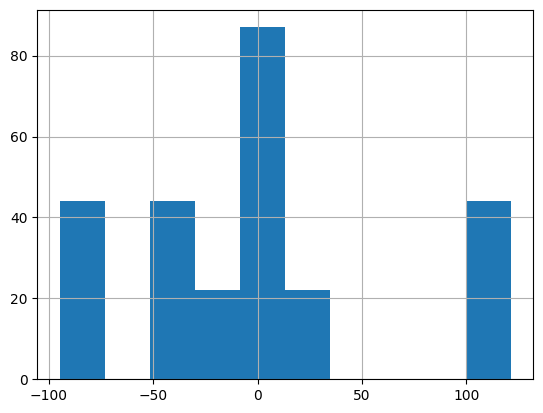

In [57]:
plt.figure();
crop['Rainfall'].diff().hist()

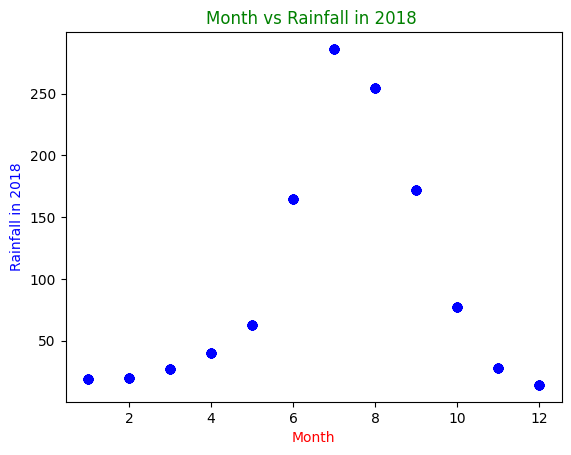

In [58]:
plt.scatter(crop["Month"],crop["Rainfall"],color="blue",label="scatter")

plt.xlabel("Month",color="red") #xlabel() defines the label of x-axis
plt.ylabel("Rainfall in 2018",color="blue") #ylabel() defines the label of x-axis
plt.title("Month vs Rainfall in 2018 ",color="green") #title() is used to give title of this scatter plot

plt.show()

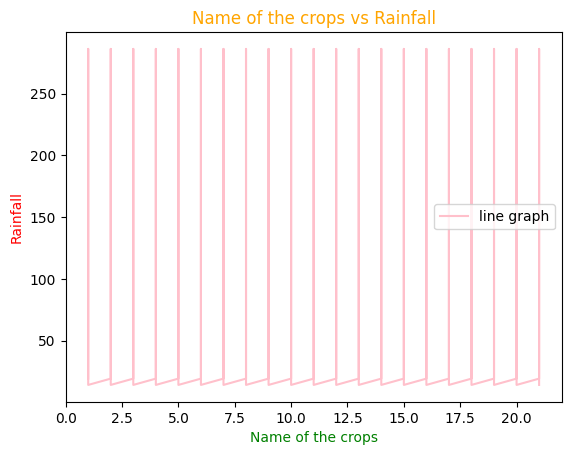

In [61]:
plt.plot(crop["Name"],crop["Rainfall"],color="pink",label="line graph")

plt.xlabel("Name of the crops",color="green") #xlabel() defines the label of x-axis
plt.ylabel("Rainfall",color="red") #ylabel() defines the label of x-axis
plt.title("Name of the crops vs Rainfall",color="orange") #title() is used to give title of this scatter plot
plt.legend()
plt.show()

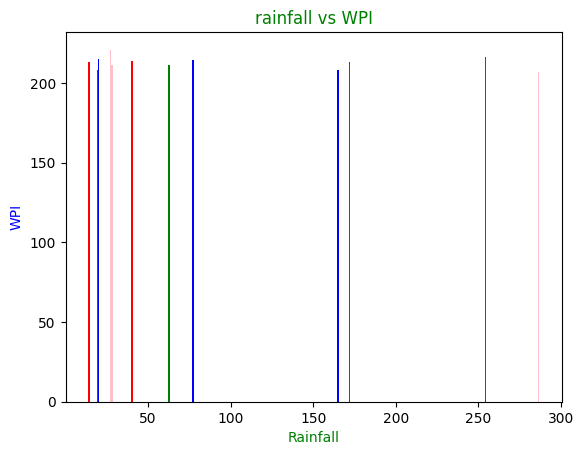

In [60]:
plt.bar(crop["Rainfall"],crop["WPI"],color=["green","blue","pink","red"])
 
plt.xlabel("Rainfall",color="green")
plt.ylabel("WPI",color="blue")
plt.title("rainfall vs WPI",color="green")
plt.show()